<a href="https://colab.research.google.com/github/aalr007/NavegacionAutonoma/blob/main/4_2_Detecci%C3%B3n_de_Se%C3%B1ales_de_Tr%C3%A1nsito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Navegación Autónoma*** </center>
## <center> ***Actividad 4.2 - Detección de Señales de Tránsito*** </center>

### Profesor: Dr. David Antonio Torres
### Alumnos: 
* Andrei García Torres               A01793891
* Aurelio Antonio Lozano Rábago      A01081266
* Jorge Luis Tapia Peñaloza          A01793013
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 11 de Junio del 2023 </p>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

from google.colab import drive
import glob

#Se carga el dataset y se verifica el número de muestras en cada set

In [2]:
drive.mount('/content/drive',force_remount=True)
file_path = '/content/drive/MyDrive/GTRA/*'


Mounted at /content/drive


In [3]:
ID0 = glob.glob('/content/drive/MyDrive/GTRA/0/*')
ID1 = glob.glob('/content/drive/MyDrive/GTRA/1/*')
ID2 = glob.glob('/content/drive/MyDrive/GTRA/2/*')
ID3 = glob.glob('/content/drive/MyDrive/GTRA/3/*')
ID4 = glob.glob('/content/drive/MyDrive/GTRA/4/*')
ID5 = glob.glob('/content/drive/MyDrive/GTRA/5/*')
ID6 = glob.glob('/content/drive/MyDrive/GTRA/6/*')
ID7 = glob.glob('/content/drive/MyDrive/GTRA/7/*')
ID8 = glob.glob('/content/drive/MyDrive/GTRA/8/*')
ID9 = glob.glob('/content/drive/MyDrive/GTRA/9/*')
ID10 = glob.glob('/content/drive/MyDrive/GTRA/10/*')
ID11 = glob.glob('/content/drive/MyDrive/GTRA/11/*')
ID12 = glob.glob('/content/drive/MyDrive/GTRA/12/*')
ID13 = glob.glob('/content/drive/MyDrive/GTRA/13/*')
ID14 = glob.glob('/content/drive/MyDrive/GTRA/14/*')
ID15 = glob.glob('/content/drive/MyDrive/GTRA/15/*')
ID16 = glob.glob('/content/drive/MyDrive/GTRA/16/*')
ID17 = glob.glob('/content/drive/MyDrive/GTRA/17/*')
ID18 = glob.glob('/content/drive/MyDrive/GTRA/18/*')
ID19 = glob.glob('/content/drive/MyDrive/GTRA/19/*')
ID20 = glob.glob('/content/drive/MyDrive/GTRA/20/*')
ID21 = glob.glob('/content/drive/MyDrive/GTRA/21/*')
ID22 = glob.glob('/content/drive/MyDrive/GTRA/22/*')
ID23 = glob.glob('/content/drive/MyDrive/GTRA/23/*')
ID24 = glob.glob('/content/drive/MyDrive/GTRA/24/*')
ID25 = glob.glob('/content/drive/MyDrive/GTRA/25/*')
ID26 = glob.glob('/content/drive/MyDrive/GTRA/26/*')
ID27 = glob.glob('/content/drive/MyDrive/GTRA/27/*')
ID28 = glob.glob('/content/drive/MyDrive/GTRA/28/*')
ID29 = glob.glob('/content/drive/MyDrive/GTRA/29/*')
ID30 = glob.glob('/content/drive/MyDrive/GTRA/30/*')
ID31 = glob.glob('/content/drive/MyDrive/GTRA/31/*')
ID32 = glob.glob('/content/drive/MyDrive/GTRA/32/*')
ID33 = glob.glob('/content/drive/MyDrive/GTRA/33/*')
ID34 = glob.glob('/content/drive/MyDrive/GTRA/34/*')
ID35 = glob.glob('/content/drive/MyDrive/GTRA/35/*')
ID36 = glob.glob('/content/drive/MyDrive/GTRA/36/*')
ID37 = glob.glob('/content/drive/MyDrive/GTRA/37/*')
ID38 = glob.glob('/content/drive/MyDrive/GTRA/38/*')
ID39 = glob.glob('/content/drive/MyDrive/GTRA/39/*')
ID40 = glob.glob('/content/drive/MyDrive/GTRA/40/*')
ID41 = glob.glob('/content/drive/MyDrive/GTRA/41/*')
ID42 = glob.glob('/content/drive/MyDrive/GTRA/42/*')

In [4]:
print(len(ID0))
print(len(ID1))
print(len(ID2))
print(len(ID3))
print(len(ID4))
print(len(ID5))
print(len(ID6))
print(len(ID7))
print(len(ID8))
print(len(ID9))
print(len(ID10))
print(len(ID11))
print(len(ID12))
print(len(ID13))
print(len(ID14))
print(len(ID15))
print(len(ID16))
print(len(ID17))
print(len(ID18))
print(len(ID19))
print(len(ID20))
print(len(ID21))
print(len(ID22))
print(len(ID23))
print(len(ID24))
print(len(ID25))
print(len(ID26))
print(len(ID27))
print(len(ID28))
print(len(ID29))
print(len(ID30))
print(len(ID31))
print(len(ID32))
print(len(ID33))
print(len(ID34))
print(len(ID35))
print(len(ID36))
print(len(ID37))
print(len(ID38))
print(len(ID39))
print(len(ID40))
print(len(ID41))
print(len(ID42))

210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210


Cambiamos el tamaño de las imagenes para que todas sean del mismo tamaño.

In [5]:
size = (25, 25)
IList = [ID0, ID1,ID2, ID3, ID4, ID5, ID6,ID7,ID8,ID9,ID10,ID11,ID12,ID13,ID14,ID15,ID16,ID17,ID18,ID19,ID20,ID21,ID22,ID23,ID24,ID25,ID26,ID27,ID28,ID29,ID30,ID31,ID32,ID33,ID34,ID35,ID26,ID37,ID38,ID39,ID40,ID41,ID42]
X = []

for sublist in IList:
    images = [cv2.resize(plt.imread(img_path), size) for img_path in sublist]
    X.extend(images)

X = np.array(X)

In [6]:
print(X.shape)

(9030, 25, 25, 3)


Convertir la lista de listas en un arreglo unidimensional

Imprimimos una imagen para checar

Creamos las etiquetas de la salida

In [7]:
Y0 = [0] * len(ID0)
Y1 = [1] * len(ID1)
Y2 = [2] * len(ID2)
Y3 = [3] * len(ID3)
Y4 = [4] * len(ID4)
Y5 = [5] * len(ID5)
Y6 = [6] * len(ID6)
Y7 = [7] * len(ID7)
Y8 = [8] * len(ID8)
Y9 = [9] * len(ID9)
Y10 = [10] * len(ID10)
Y11 = [11] * len(ID11)
Y12 = [12] * len(ID12)
Y13 = [13] * len(ID13)
Y14 = [14] * len(ID14)
Y15 = [15] * len(ID15)
Y16 = [16] * len(ID16)
Y17 = [17] * len(ID17)
Y18 = [18] * len(ID18)
Y19 = [19] * len(ID19)
Y20 = [20] * len(ID20)
Y21 = [21] * len(ID21)
Y22 = [22] * len(ID22)
Y23 = [23] * len(ID23)
Y24 = [24] * len(ID24)
Y25 = [25] * len(ID25)
Y26 = [26] * len(ID26)
Y27 = [27] * len(ID27)
Y28 = [28] * len(ID28)
Y29 = [29] * len(ID29)
Y30 = [30] * len(ID30)
Y31 = [31] * len(ID31)
Y32 = [32] * len(ID32)
Y33 = [33] * len(ID33)
Y34 = [34] * len(ID34)
Y35 = [35] * len(ID35)
Y36 = [36] * len(ID36)
Y37 = [37] * len(ID37)
Y38 = [38] * len(ID38)
Y39 = [39] * len(ID39)
Y40 = [40] * len(ID40)
Y41 = [41] * len(ID41)
Y42 = [42] * len(ID42)

Hacemos one hot encoding para cada salida

In [8]:
Y = to_categorical (Y0+Y1+Y2+Y3+Y4+Y5+Y6+Y7+Y8+Y9+Y10+Y11+Y12+Y13+Y14+Y15+Y16+Y17+Y18+Y19+Y20+Y21+Y22+Y23+Y24+Y25+Y26+Y27+Y28+Y29+Y30+Y31+Y32+Y33+Y34+Y35+Y36+Y37+Y38+Y39+Y40+Y41+Y42,43)
Y = np.array(Y)

In [9]:
print(Y.shape)

(9030, 43)


Se Define el modelo

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = X.shape[1:], activation='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#model.add(AveragePooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 625, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 625, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 43, activation='softmax'))

model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 23, 23, 32)        896       
                                                                 
 conv2d_30 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 average_pooling2d_7 (Averag  (None, 10, 10, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_11 (Dropout)        (None, 10, 10, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 6, 64)          36928     
                                                      

Se separa un 10% del set de entrenamiento para fines de validación

In [29]:
# Obtener el índice del punto de corte para separar los datos de entrenamiento y validación
split_index = int(len(X) * 0.9)

# Separar los datos de entrenamiento y validación
X_train = X[:split_index]
y_train = Y[:split_index]
X_val = X[split_index:]
y_val = Y[split_index:]

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 40, batch_size = 50, verbose = 1, shuffle = True)

Epoch 1/40
147/147 [==============================] - 20s 127ms/step - loss: 3.5883 - accuracy: 0.0358 - val_loss: 6.0379 - val_accuracy: 0.0000e+00
Epoch 2/40
  1/147 [..............................] - ETA: 16s - loss: 3.4237 - accuracy: 0.0200

In [13]:
print(X_val.shape)
print(y_val.shape)

(903, 25, 25, 3)
(903, 43)


In [14]:
scores = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

29/29 [==============================] - 1s 27ms/step - loss: 21.0745 - accuracy: 0.0000e+00
Test loss: 21.07447624206543
Test accuracy: 0.0


Text(0.5, 0, 'epoch')

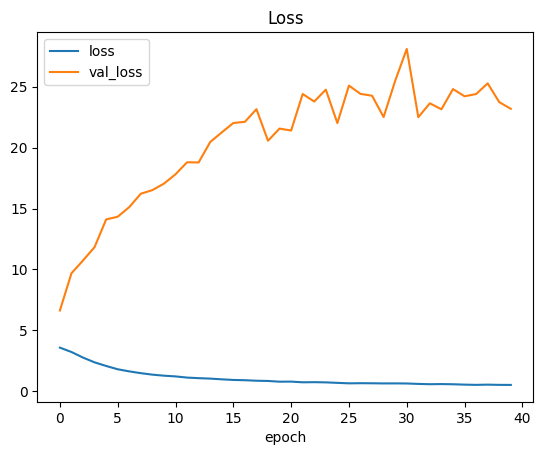

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

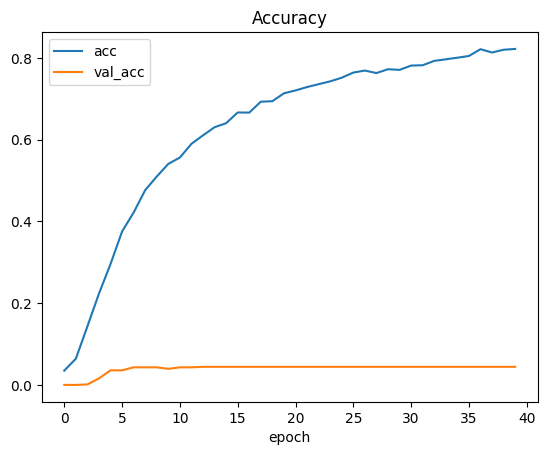

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

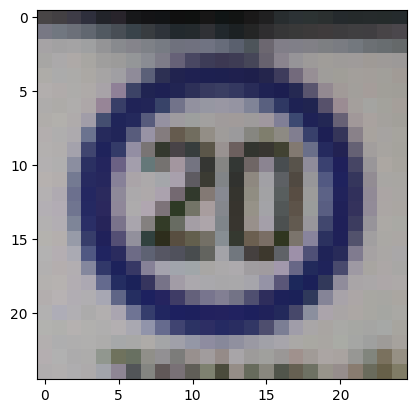

In [17]:
import cv2
import glob
import matplotlib.pyplot as plt

TstImg = glob.glob('/content/drive/MyDrive/GTRA/Test/*')
TstImg = ID0[0]  # Selecciona la primera imagen de la lista

img_arr = cv2.imread(TstImg)  # Carga la imagen utilizando cv2.imread
img_rs = cv2.resize(img_arr, (25, 25))  # Redimensiona la imagen a 25x25
img_dim = np.expand_dims(img_rs, axis=0)  # Agrega una dimensión adicional

plt.imshow(img_rs)
plt.show()

In [18]:
print(img_dim.shape)

(1, 25, 25, 3)


In [19]:
prediction = np.argmax(model.predict(img_dim), axis=-1)
print("objeto:", str(prediction))

1/1 [==============================] - 0s 177ms/step
objeto: [0]
